<a href="https://colab.research.google.com/github/004Saichaithanya/sai-chaithanya-yolo-model/blob/main/InfosysProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install albumentations

In [2]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 28.7 MB/s eta 0:00:00


In [3]:
!mkdir -p /content/vegetation

In [4]:
!unzip "/content/drive/MyDrive/Infosys_Project/vegation.v2i.yolov8.zip" -d "/content/vegetation/"


Archive:  /content/drive/MyDrive/Infosys_Project/vegation.v2i.yolov8.zip
 extracting: /content/vegetation/README.dataset.txt  
 extracting: /content/vegetation/README.roboflow.txt  
 extracting: /content/vegetation/data.yaml  
   creating: /content/vegetation/test/
   creating: /content/vegetation/test/images/
 extracting: /content/vegetation/test/images/0-1-14_png.rf.571ebae03cd52ceac7ac1beee7c4e52e.jpg  
 extracting: /content/vegetation/test/images/0-1-4_png.rf.52706a8121e702d22fe4b744ad603a5e.jpg  
 extracting: /content/vegetation/test/images/0-13-15_png.rf.a87017e74e06c80c5cb466c08da01027.jpg  
 extracting: /content/vegetation/test/images/0-13-37_png.rf.24fecf374abb8e9bf3c69fcd642b4814.jpg  
 extracting: /content/vegetation/test/images/0-2-1_png.rf.1ae60430c36a46864d04f6d5ca407662.jpg  
 extracting: /content/vegetation/test/images/0-21-20_png.rf.6407b0e4dd15fef6d8a5417032f3ad25.jpg  
 extracting: /content/vegetation/test/images/0-23-19_png.rf.217c24f9ec7821eb74fe3927e1aba1f2.jpg  


In [ ]:
from ultralytics import YOLO

# Load segmentation model (nano or medium)
model = YOLO("yolov8m-seg.pt")

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
from ultralytics import YOLO


model.train(
    data="/content/vegetation/data.yaml",
    epochs=50,            # max 50 epochs
    imgsz=1024,           # higher resolution for finer segmentation
    batch=8,              # adjust based on GPU memory

    # Early Stopping
    patience=10,          # stop if no improvement in 10 epochs

    # Learning Rate Scheduler (Cosine decay)
    lr0=0.01,             # initial learning rate
    lrf=0.001,            # final learning rate (cosine decay)
    cos_lr=True,          # enable cosine learning rate

    # Optimized Augmentations
    hsv_h=0.02,
    hsv_s=0.5,
    hsv_v=0.4,
    degrees=10,
    translate=0.05,
    scale=0.3,
    shear=2,
    flipud=0.0,
    fliplr=0.5,
    mosaic=0.5,
    mixup=0.1,
    copy_paste=0.0
)



Ultralytics 8.3.203 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=True, cutmix=0.0, data=/content/vegetation/data.yaml, degrees=10, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.02, hsv_s=0.5, hsv_v=0.4, imgsz=1024, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.001, mask_ratio=4, max_det=300, mixup=0.1, mode=train, model=yolov8m-seg.pt, momentum=0.937, mosaic=0.5, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=10, perspective=0.0, plots=True, pose

ultralytics.utils.metrics.SegmentMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7c06863c5580>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)', 'Precision-Recall(M)', 'F1-Confidence(M)', 'Precision-Confidence(M)', 'Recall-Confidence(M)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041, 

In [ ]:
# Evaluate the trained YOLO model
metrics = model.val(
    data="/content/vegetation/data.yaml",   # Same data.yaml
    imgsz=640,
    split='val'   # validation set (can be 'test' if you want)
)

# Print main metrics
print("✅ Results:")
print(f"mAP50:     {metrics.box.map50:.4f}")   # mean AP at IoU 0.5
print(f"mAP50-95:  {metrics.box.map:.4f}")     # mean AP at IoU 0.5–0.95
print(f"Precision: {metrics.box.mp:.4f}")
print(f"Recall:    {metrics.box.mr:.4f}")


Ultralytics 8.3.203 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8m-seg summary (fused): 105 layers, 27,222,963 parameters, 0 gradients, 104.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2832.8±316.2 MB/s, size: 215.6 KB)
val: Scanning /content/vegetation/valid/labels.cache... 59 images, 9 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 59/59 114.5Kit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 8/8 2.3it/s 3.5s
                   all         59        132       0.64       0.58      0.608      0.394      0.679      0.561      0.608      0.368
Speed: 4.8ms preprocess, 32.7ms inference, 0.1ms loss, 6.2ms postprocess per image
Results saved to /content/runs/segment/train2
✅ Results:
mAP50:     0.6083
mAP50-95:  0.3943
Precision: 0.6404
Recall:    0.5802


In [ ]:
# ! cp -r /content/runs/segment/train/weights/best.pt /content/drive/MyDrive/Infosys_Project/

In [ ]:
!cat /content/vegetation/data.yaml

train: ../train/images
val: ../valid/images
test: ../test/images

nc: 1
names: ['vegetation']

roboflow:
  workspace: blue-halo
  project: vegetation-segmentation
  version: 2
  license: Public Domain
  url: https://universe.roboflow.com/blue-halo/vegetation-segmentation/dataset/2

In [5]:
# ✅ Final YOLOv8 Segmentation Training Pipeline
from ultralytics import YOLO

# 1. Load Pretrained Model (Large for best accuracy)
model = YOLO("yolov8l-seg.pt")

# 2. Train Model with Optimized Hyperparameters
model.train(
    data="/content/vegetation/data.yaml",  # dataset config
    epochs=50,               # max epochs (early stopping may stop earlier)
    imgsz=1024,              # high resolution for fine segmentation
    batch=4,                 # smaller batch for Colab GPU
    patience=15,             # stop if no improvement after 15 epochs

    # ⚡ Learning Rate & Optimizer
    lr0=0.003,               # lower initial LR for stability
    lrf=0.0005,              # smaller final LR
    cos_lr=True,             # cosine decay schedule
    optimizer="AdamW",       # more stable than SGD
    weight_decay=0.001,      # regularization (avoid overfitting)

    # 🎨 Data Augmentation (strong but not too heavy)
    hsv_h=0.015,
    hsv_s=0.7,
    hsv_v=0.4,
    degrees=15,
    translate=0.1,
    scale=0.5,
    shear=3,
    flipud=0.2,
    fliplr=0.5,
    mosaic=0.8,
    mixup=0.2,
    copy_paste=0.1
)

# 3. Evaluate the trained model on validation set
metrics = model.val(
    data="/content/vegetation/data.yaml",
    imgsz=1024,
    split="val"   # use 'test' if you have a separate test set
)

# 4. Print Results
print("✅ Final Evaluation Metrics:")
print(f"mAP50:     {metrics.seg.map50:.4f}")    # IoU=0.5
print(f"mAP50-95:  {metrics.seg.map:.4f}")      # IoU=0.5:0.95
print(f"Precision: {metrics.seg.mp:.4f}")
print(f"Recall:    {metrics.seg.mr:.4f}")

# 5. Save Best Weights
model.save("/content/vegetation_yolov8l_seg_best.pt")


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Ultralytics 8.3.203 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=4, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.1, copy_paste_mode=flip, cos_lr=True, cutmix=0.0, data=/content/vegetation/data.yaml, degrees=15, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.2, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=1024, int8=False, iou=0.7, keras=Fa

In [6]:
! cp -r /content/runs/segment/train/weights/best.pt /content/drive/MyDrive/Infosys_Project/best_large.pt

Model From Scratch

In [ ]:
import os
import cv2
import numpy as np
import tensorflow as tf
from glob import glob

IMG_SIZE = 128   # resize all images & masks to 128x128

# Utility: Convert YOLO txt to mask (handling segmentation data)
def yolo_to_mask(txt_file, img_shape, class_id=0):
    mask = np.zeros(img_shape[:2], dtype=np.uint8)
    h, w = img_shape[:2]

    with open(txt_file, "r") as f:
        for line in f:
            values = list(map(float, line.split()))
            if int(values[0]) == class_id:  # Check class_id
                # Assuming the format is class_id x_center y_center width height for bounding box
                # and class_id x1 y1 x2 y2 ... for segmentation
                # We'll handle segmentation data here by creating a polygon mask
                if len(values) > 5: # Segmentation data
                    polygon_points = np.array(values[1:]).reshape(-1, 2)
                    # Convert normalized coordinates to pixel coordinates
                    polygon_points[:, 0] *= w
                    polygon_points[:, 1] *= h
                    polygon_points = polygon_points.astype(np.int32)
                    cv2.fillPoly(mask, [polygon_points], 1)
                elif len(values) == 5: # Bounding box data (optional, depends on your dataset)
                    c, x_center, y_center, bw, bh = values
                    x1 = int((x_center - bw/2) * w)
                    y1 = int((y_center - bh/2) * h)
                    x2 = int((x_center + bw/2) * w)
                    y2 = int((y_center + bh/2) * h)
                    mask[y1:y2, x1:x2] = 1 # Fill bounding box
    return mask

# Load dataset (images + masks)
def load_dataset(img_dir, label_dir):
    images, masks = [], []
    for img_path in glob(os.path.join(img_dir, "*.jpg")):  # adjust to png if needed
        img = cv2.imread(img_path)
        img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
        img = img / 255.0  # normalize

        label_path = os.path.join(label_dir, os.path.basename(img_path).replace(".jpg", ".txt"))
        # Handle potential missing label files
        if not os.path.exists(label_path):
            print(f"Warning: Label file not found for {img_path}. Skipping.")
            continue

        mask = yolo_to_mask(label_path, img.shape, class_id=0)
        mask = cv2.resize(mask, (IMG_SIZE, IMG_SIZE), interpolation=cv2.INTER_NEAREST) # Use nearest neighbor for mask resizing
        mask = np.expand_dims(mask, axis=-1)  # add channel

        images.append(img)
        masks.append(mask)

    return np.array(images), np.array(masks)

# Paths
train_img_dir = "/content/vegetation/train/images"
train_lbl_dir = "/content/vegetation/train/labels"

valid_img_dir = "/content/vegetation/valid/images"
valid_lbl_dir = "/content/vegetation/valid/labels"

X_train, y_train = load_dataset(train_img_dir, train_lbl_dir)
X_valid, y_valid = load_dataset(valid_img_dir, valid_lbl_dir)

print("Train:", X_train.shape, y_train.shape)
print("Valid:", X_valid.shape, y_valid.shape)

Train: (681, 128, 128, 3) (681, 128, 128, 1)
Valid: (59, 128, 128, 3) (59, 128, 128, 1)


In [ ]:
!pip install tensorflow
!pip install opencv-python matplotlib scikit-learn albumentations



In [ ]:
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [ ]:
def build_segmentation_model(img_size=128):
    inputs = layers.Input((img_size, img_size, 3))

    # Encoder
    c1 = layers.Conv2D(32, (3,3), activation="relu", padding="same")(inputs)
    p1 = layers.MaxPooling2D((2,2))(c1)

    c2 = layers.Conv2D(64, (3,3), activation="relu", padding="same")(p1)
    p2 = layers.MaxPooling2D((2,2))(c2)

    # Bottleneck
    b1 = layers.Conv2D(128, (3,3), activation="relu", padding="same")(p2)

    # Decoder
    u1 = layers.UpSampling2D((2,2))(b1)
    c3 = layers.Conv2D(64, (3,3), activation="relu", padding="same")(u1)

    u2 = layers.UpSampling2D((2,2))(c3)
    c4 = layers.Conv2D(32, (3,3), activation="relu", padding="same")(u2)

    outputs = layers.Conv2D(1, (1,1), activation="sigmoid")(c4)

    return models.Model(inputs, outputs)

model = build_segmentation_model(IMG_SIZE)

optimizer=Adam(learning_rate=1e-3)

model.compile(optimizer=optimizer, loss="binary_crossentropy", metrics=["accuracy"])
model.summary()


Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)      │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_30 (Conv2D)              │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_31 (Conv2D)              │ (None, 64, 64, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_32 (Conv2D)              │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_10 (UpSampling2D) │ (None, 64, 64, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_33 (Conv2D)              │ (None, 64, 64, 64)     │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_11 (UpSampling2D) │ (None, 128, 128, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_34 (Conv2D)              │ (None, 128, 128, 32)   │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_35 (Conv2D)              │ (None, 128, 128, 1)    │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 185,537 (724.75 KB)

 Trainable params: 185,537 (724.75 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [ ]:

from tensorflow.keras.callbacks import ReduceLROnPlateau
early_stop = EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True)



reduce_lr = ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=3, min_lr=1e-6)


history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    epochs=50,
    batch_size=16,
    callbacks=[early_stop,reduce_lr],
    verbose=1
)


Epoch 1/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 9s 100ms/step - accuracy: 0.6157 - loss: 0.6349 - val_accuracy: 0.8757 - val_loss: 0.3691 - learning_rate: 0.0010
Epoch 2/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.8049 - loss: 0.4471 - val_accuracy: 0.8854 - val_loss: 0.3012 - learning_rate: 0.0010
Epoch 3/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.8256 - loss: 0.3926 - val_accuracy: 0.8580 - val_loss: 0.3224 - learning_rate: 0.0010
Epoch 4/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.8475 - loss: 0.3492 - val_accuracy: 0.8772 - val_loss: 0.3279 - learning_rate: 0.0010
Epoch 5/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.8164 - loss: 0.4068 - val_accuracy: 0.8953 - val_loss: 0.2593 - learning_rate: 0.0010
Epoch 6/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.8571 - loss: 0.3309 - val_accuracy: 0.8455 - val_loss: 0.3484 - learning_rate: 0.0010
Epoch 7/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.8390 - loss: 0.3676 - val_ac

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 620ms/step


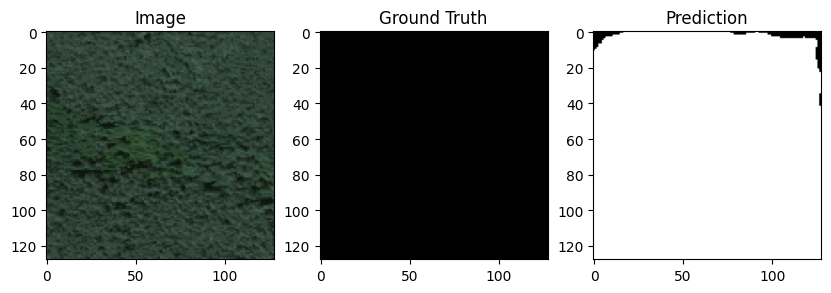

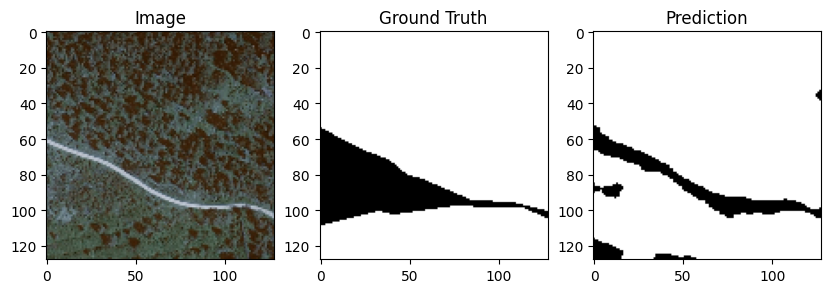

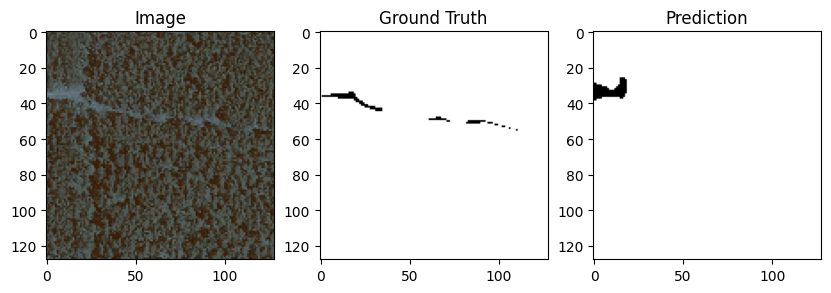

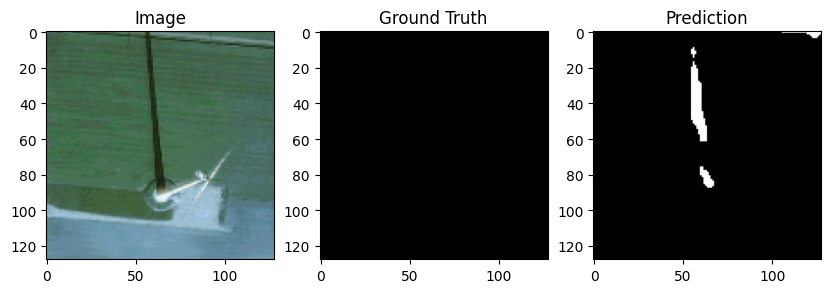

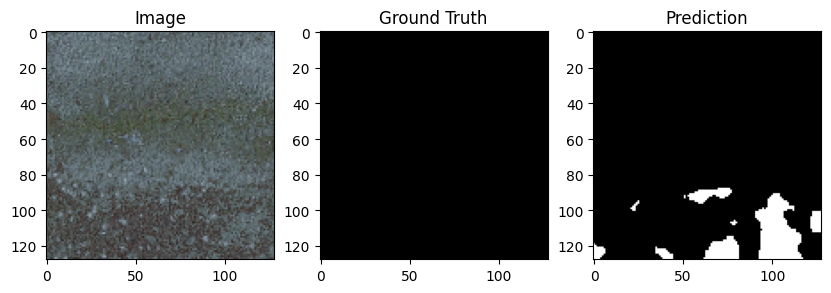

In [ ]:
preds = model.predict(X_valid[:5])
import matplotlib.pyplot as plt

save_dir = "/content/segmentation_results"
os.makedirs(save_dir, exist_ok=True)

for i in range(5):
    plt.figure(figsize=(10,3))
    plt.subplot(1,3,1); plt.imshow(X_valid[i]); plt.title("Image")
    plt.subplot(1,3,2); plt.imshow(y_valid[i].squeeze(), cmap="gray"); plt.title("Ground Truth")
    plt.subplot(1,3,3); plt.imshow((preds[i]>0.5).squeeze(), cmap="gray"); plt.title("Prediction")
    plt.savefig(os.path.join(save_dir, f"result_{i}.png"))
    plt.show()


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, jaccard_score

# Get predictions on validation set
y_pred = model.predict(X_valid)
y_pred_bin = (y_pred > 0.5).astype("int")   # threshold at 0.5


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 420ms/step


In [ ]:
y_true_flat = y_valid.flatten()
y_pred_flat = y_pred_bin.flatten()


In [ ]:
acc  = accuracy_score(y_true_flat, y_pred_flat)
prec = precision_score(y_true_flat, y_pred_flat, zero_division=0)
rec  = recall_score(y_true_flat, y_pred_flat, zero_division=0)
f1   = f1_score(y_true_flat, y_pred_flat, zero_division=0)
iou  = jaccard_score(y_true_flat, y_pred_flat, zero_division=0)

print(f"✅ Accuracy:  {acc:.4f}")
print(f"✅ Precision: {prec:.4f}")
print(f"✅ Recall:    {rec:.4f}")
print(f"✅ F1 Score:  {f1:.4f}")
print(f"✅ IoU:       {iou:.4f}")


✅ Accuracy:  0.9471
✅ Precision: 0.9360
✅ Recall:    0.9540
✅ F1 Score:  0.9449
✅ IoU:       0.8955
